<a href="https://colab.research.google.com/github/reworkhow/AnimalDataScience/blob/main/Copy_of_l02_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perspective Transformation Using Linear Equations
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: Aug 3, 2022

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l02/transformation.png?raw=1" width="800"/></center>

## **Set up the environment**
### Clone the repository (demo data and scripts)

In [1]:
# use a exclamation mark, "!", to call Shell command in Python
# !git clone https://github.com/vt-ads/intro_to_phenomics

Cloning into 'intro_to_phenomics'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 318 (delta 0), reused 2 (delta 0), pack-reused 311
Receiving objects: 100% (318/318), 66.54 MiB | 19.77 MiB/s, done.
Resolving deltas: 100% (108/108), done.


### Change the working directory

In [3]:
import os
# change WD
os.chdir("/content/intro_to_phenomics")
# print WD
print("Current folder: ", os.getcwd())

Current folder:  /content/intro_to_phenomics


## **Define 2D points**
### Load modules
In this section, we need `NumPy` to implement the matrix calculation, and use `Matplotlib` to visually validate our results.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

###  Augmented vector
We can define a list of 2D points, $P\in \mathbb{R}^{3\times n}$, where $n$ is the number of points, as below:

$$
P = \begin{bmatrix}
        x\\    y\\   1
    \end{bmatrix}
\tag{1}
$$

Noted that we need the third element, 1, for linear transformation. This form of vector is also known as "augmented vector".

In [6]:
# use lists to describe each vector: x, y, and intercept
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4

# put them in a numpy array
P = np.array([x,
              y,
              i])

# print
print("P \n", P)

P 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]


### Visualize the vector
Visualize the vector P on a XY coordinate plane

(0.0, 50.0)

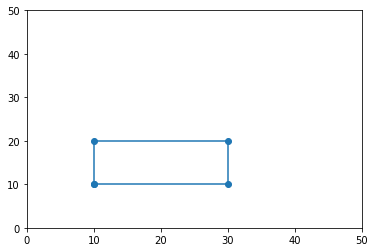

In [9]:
# we don't need the intercept at this point, so we can use "_" to represent it
x, y, _ = P

# to complete a shape, append the array by the first element
# e.g., from [0, 1, 2, 3] to [0, 1, 2, 3, 0]
x = np.append(x, x[0])
y = np.append(y, y[0])

# use 'o' to mark each data point
plt.plot(x, y, marker='o')
# set boundaries
plt.xlim(0, 50)
plt.ylim(0, 50)

#### *Exercise 1*
Wrap up the scripts to a Python function that plots a closed shape from an input vector $P$.

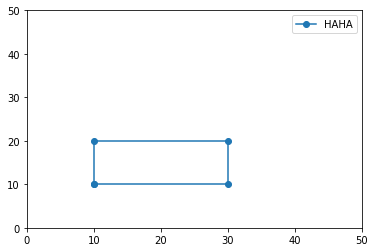

In [13]:
def plot_shape(P, label=""):
    """ visualize a closed shape defined by a list 2D points

    Parameters
    ----------
    P : array_like
        a NumPy array in a shape of (3, 4). The first axis should contain
        xy-coordinate values in an order of [x, y, 1]
    label : str, optional
        plot legend label, by default ""
    """
    # we don't need the intercept at this point, so we can use "_" to represent it
    x, y, _ = P

    # to complete a shape, append the array by the first element
    # e.g., from [0, 1, 2, 3] to [0, 1, 2, 3, 0]
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    # use 'o' to mark each data point
    plt.plot(x ,y, marker='o', label=label)
    # set boundaries
    plt.xlim(0, 50)
    plt.ylim(0, 50)

# test your function
plot_shape(P,label="HAHA")
plt.legend()

## **Move the shape**
### The intuitive way

P: 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat: 
 [[25 45 45 25]
 [25 25 35 35]
 [16 16 16 16]]


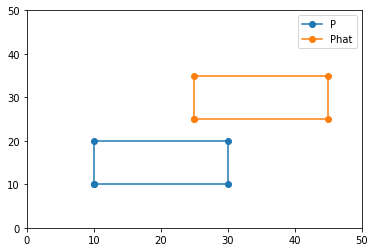

In [14]:
# intuitively move the entire matrix
Phat = P + 15
print("P: \n", P)
print("Phat: \n", Phat)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

### Linear algebra

We can express the relationship in the following linear equations:

$$
\begin{split}
x + 0y + t_x &= x' \\
0x + y + t_y &= y' \\
0x + 0y + 1 &= 1
\end{split}
$$

where $x'$, $y'$ are the newly obtained coordinates after moving the $x$ and $y$ coordinates by $t_x$ and $t_y$ units, respectively.

And we can represent the equations using linear algebra:

$$
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y \\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
\tag{2}
$$

Or

$$
\hat{P}
=
\begin{bmatrix}
    I & t \\
    0^T & 1
\end{bmatrix}
P
\tag{3}
$$

where

$$
\hat{P}
=
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
,\;
P
=
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
,\;
t
=
\begin{bmatrix}
    t_x \\ t_y
\end{bmatrix}
,\;
I
=
\begin{bmatrix}
    1 & 0 \\
    0 & 1
\end{bmatrix}
$$

#### *Exercise 2*
Define a function allowing users to move $P$ by (`tx`, `ty`). Hint: use `np.matmul()` to implement matrix multiplication.

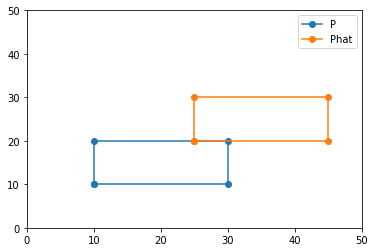

In [23]:
def move_shape(P, tx, ty):
    """Move points P by tx units on x-axis and ty units on y-axis

    Parameters
    ----------
    P : array_like
        a NumPy array in a shape of (3, 4). The first axis should contain
        xy-coordinate values in an order of [x, y, 1]
    tx : int
        move P by tx units on x-axis
    ty : int
        move P by ty units on y-axis

    Returns
    -------
    P_hat: array_like
        new coordinates that are moved from P by (tx, ty) units.
    """
    myT = [[1,0,tx],
           [0,1,ty],
            [0,0,1]]
    Phat = np.matmul(myT,P)
    return Phat

# validate the result
Phat = move_shape(P, tx=15, ty=10)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
# set boundaries
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.legend()

In [25]:
def move_shape(P, tx, ty):
    """Move points P by tx units on x-axis and ty units on y-axis

    Parameters
    ----------
    P : array_like
        a NumPy array in a shape of (3, 4). The first axis should contain
        xy-coordinate values in an order of [x, y, 1]
    tx : int
        move P by tx units on x-axis
    ty : int
        move P by ty units on y-axis

    Returns
    -------
    P_hat: array_like
        new coordinates that are moved from P by (tx, ty) units.
    """
    myT = [[1,0,tx],
           [0,1,ty]]
    Phat = np.matmul(myT,P)
    return Phat

# validate the result
Phat = move_shape(P, tx=15, ty=10)

# plotting
#plot_shape(P, "P")
#plot_shape(Phat, "Phat")
# set boundaries
#plt.xlim(0, 50)
#plt.ylim(0, 50)
#plt.legend()

In [27]:
P

array([[10, 30, 30, 10],
       [10, 10, 20, 20],
       [ 1,  1,  1,  1]])

## **Rotate the shape**
If we futher define other elements in the transformation matrix, we are able to rotate $P$ by any specific angle. We can re-define the transformation as:

$$
\hat{P}
=
\begin{bmatrix}
    R & t \\
    0^T & 1
\end{bmatrix}
P
\tag{4}
$$

where

$$
\hat{P}
=
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
,\;
P
=
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}
,\;
t
=
\begin{bmatrix}
    t_x \\ t_y
\end{bmatrix}
,\;
R =
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta}
\end{bmatrix}
$$


#### *Exercise 3*
Define a function allowing users to move $P$ by (`tx`, `ty`) and rotate $P$ by `angle` degrees. Hint: use `np.sin()` and `np.cos()`


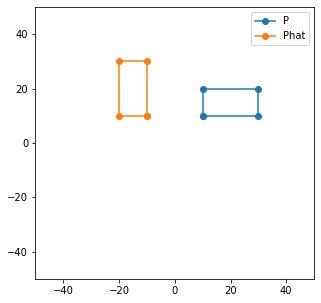

In [65]:
def move_shape_v2(P, tx, ty, angle=0):
    # convert from angle degree to radian
    radian = angle * np.pi / 180
    myT = [[np.cos(radian),-np.sin(radian),tx],
           [np.sin(radian),np.cos(radian),ty],
            [0,0,1]]
    Phat = np.matmul(myT,P)
    return Phat
# validate the result
Phat = move_shape_v2(P, tx=0, ty=0, angle=90)

# plotting
plt.figure(figsize=(5, 5))

plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.legend()

## **Perspective transformation**
Ultimately, we want to transform $P$ to any arbitrary shape $\hat{P}$. Here we can define a transformation matrix $H \in \mathbb{R}^{3\times 3}$ following the relationship:

### Homography matrix $H$

$$
\hat{P}
=
HP
=
\begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23} \\
    h_{31} & h_{32} & h_{33} \\
\end{bmatrix}
P
\tag{5}
$$

We can set $h_{33}=1$. The constraint standardizes the vector length and reduces the degree of freedom by one.

$$
    h_{11}x + h_{12}y + h_{13} = \hat{x}
\tag{6}
$$

$$
    h_{21}x + h_{22}y + h_{23} = \hat{y}
\tag{7}
$$

$$
    h_{31}x + h_{32}y + 1 = 1
\tag{8}
$$

We can obtain the equation $(9)$ from $(6)$ and $(8)$.

$$
    \begin{split}
        h_{11}x + h_{12}y + h_{13} - h_{31}x\hat{x} - h_{32}y\hat{x} = \hat{x} \\
    \end{split}
    \tag{9}
$$

Same rule derives $(10)$ from $(7)$ and $(8)$
$$
    \begin{split}
        h_{21}x + h_{22}y + h_{23} - h_{31}x\hat{y} - h_{32}y\hat{y} = \hat{y}
    \end{split}
    \tag{10}
$$

The equations $(9)$ and $(10)$ can be represented in the linear algebra form

$$
    \begin{bmatrix}
        \hat{x} \\ \hat{y}
    \end{bmatrix}=
    \begin{bmatrix}
        x & y & 1 & 0 & 0 & 0 & -x\hat{x} & -y\hat{x} \\
        0 & 0 & 0 & x & y & 1 & -x\hat{y} & -y\hat{y}
    \end{bmatrix}
    \begin{bmatrix}
        h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32}
    \end{bmatrix}
    \tag{11}
$$

### Ordinary least squares
Does the equation $(11)$ look familiar? Yes, it is an ordinary least squares (OLS) problem!
$$
    y = X\beta + \epsilon
    \tag{12}
$$

where

$$
    y =
    \begin{bmatrix}
        \hat{x} \\ \hat{y}
    \end{bmatrix}
    ,\;
    X =
    \begin{bmatrix}
        x & y & 1 & 0 & 0 & 0 & -x\hat{x} & -y\hat{x} \\
        0 & 0 & 0 & x & y & 1 & -x\hat{y} & -y\hat{y}
    \end{bmatrix}
    ,\;
    \beta =
    \begin{bmatrix}
        h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32}
    \end{bmatrix}
$$

Minimize the error sum of squares (SSE)
$$
\begin{split}
    arg \min \epsilon^{T} \epsilon
        &= arg \min_{\beta} f(\beta)\\
        &= arg \min_{\beta}(X\beta - y)^T(X\beta - y) \\
        &= arg \min_{\beta}(\beta^TX^T - y^T)(X\beta - y) \\
        &= arg \min_{\beta}\beta^TX^TX\beta - y^TX\beta - \beta^TX^Ty + y^Ty \\
        &= arg \min_{\beta}2(\frac{1}{2}\beta^TX^TX\beta - \beta^TX^Ty) + y^Ty \\
\end{split}
$$

Find the partial derivatives of $f(\beta)$
$$
    \frac{\partial f}{\partial \beta} = \beta^TX^TX - X^Ty = 0
$$

$$
    \beta = (X^TX)^{-1}X^Ty
    \tag{13}
$$

### Implementation
With the equations we derived, we can implement the idea in Python!

#### *Define the target shape*
First, we can start with defining the source shape $P$ and the target shape $\hat{P}$.

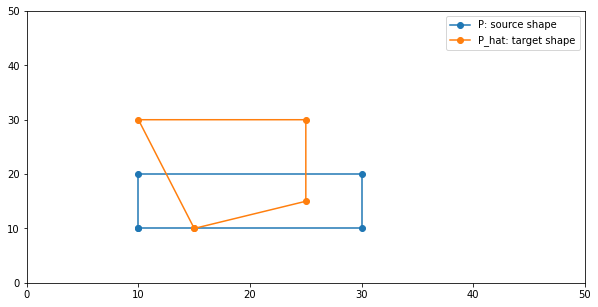

In [45]:
# define P
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4
P = np.array([x, y, i])
# define P_hat
x = [15, 25, 25, 10]
y = [10, 15, 30, 30]
P_hat = np.array([x, y, i])

# plotting
plt.figure(figsize=(10, 5))
plot_shape(P, "P: source shape")
plot_shape(P_hat, "P_hat: target shape")
plt.legend()

#### *Calculate X and y*
There are pre-defined functions to compute X and y in OLS. We can simply import them from the module.

In [50]:
# imports
from modules.LS import make_X, make_y

# use pre-defined functions
X = make_X(P, P_hat)
y = make_y(P_hat)

# validate the matrices
print("P\n", P)
print("\n")
print("P_hat\n", P_hat)
print("\n")
print("X\n", X)
print("\n")
print("y\n", y)


P
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]


P_hat
 [[15 25 25 10]
 [10 15 30 30]
 [ 1  1  1  1]]


X
 [[  10.   10.    1.    0.    0.    0. -150. -150.]
 [   0.    0.    0.   10.   10.    1. -100. -100.]
 [  30.   10.    1.    0.    0.    0. -750. -250.]
 [   0.    0.    0.   30.   10.    1. -450. -150.]
 [  30.   20.    1.    0.    0.    0. -750. -500.]
 [   0.    0.    0.   30.   20.    1. -900. -600.]
 [  10.   20.    1.    0.    0.    0. -100. -200.]
 [   0.    0.    0.   10.   20.    1. -300. -600.]]


y
 [[15]
 [10]
 [25]
 [15]
 [25]
 [30]
 [10]
 [30]]


#### *Exercise 4: Solve the OLS equation*
You will need:
- `np.matmul()` for matrix multiplication.
- `np.transpose()` to transpose a matrix.
- `np.linalg.inv()` to obtain the inverse of a matrix.

In [51]:
def solve_OLS(X, y):
    """Find the beta vector in OLS problem given the matices X and y.

    Parameters
    ----------
    X : array_like
        a NumPy array in a shape of (2 * n, 8), where n is the number of coordinates.
    y : array_like
        a NumPy array in a shape of (2 * n,)

    Returns
    -------
    beta: array_like
        a vector that can minimize residuals in the OLS equation.
        The vector shape should be (8,).
    """
    Xt = X.T
    XtX = np.matmul(Xt, X)
    XtX_i = np.linalg.inv(XtX)
    XtX_i_Xt = np.matmul(XtX_i, Xt)
    beta = np.matmul(XtX_i_Xt, y)
    return beta

# validate result
beta = solve_OLS(X, y)
print(beta)

[[ 0.78571429]
 [-0.71428571]
 [12.14285714]
 [ 0.42857143]
 [ 0.85714286]
 [-4.28571429]
 [ 0.01428571]
 [-0.02857143]]


In [52]:
y - np.matmul(X, beta)

array([[ 1.39799283e-11],
       [ 7.70938868e-13],
       [ 5.96145355e-12],
       [-6.39488462e-13],
       [-8.32045544e-12],
       [ 1.42108547e-14],
       [-5.63105118e-13],
       [ 1.03739239e-12]])

#### *Recover the shape of the matrix $H$*

In [53]:
def make_H(beta):
    return np.concatenate((beta[:, 0], [1]), axis=0).reshape(3, 3)

H = make_H(beta)
print(H)

[[ 0.78571429 -0.71428571 12.14285714]
 [ 0.42857143  0.85714286 -4.28571429]
 [ 0.01428571 -0.02857143  1.        ]]


#### *Exercise 5: Put things together (calculate the matrix $H$)*
Now we have defined everything we need to compute the matrix $H$. Define a function, `find_H()`, that takes $P$ and $\hat{P}$ as input parameters, and let it returns the homography matrix $H$.

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l02/find_H.png?raw=1" width="400"/></center>

In [56]:
def find_H(P, P_hat):
    X = make_X(P, P_hat)
    y = make_y(P_hat)
    beta = solve_OLS(X, y)
    H = make_H(beta)
    return H

H = find_H(P, P_hat)

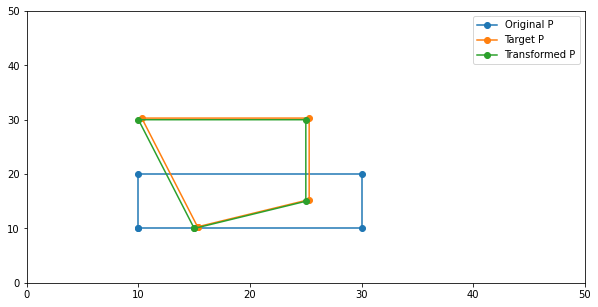

In [59]:
# validate the result
from modules.LS import transform_P
P_transformed = transform_P(P, H)
plt.figure(figsize=(10, 5))
plot_shape(P, "Original P")
plot_shape(P_hat + .3, "Target P") # add .3 to avoid completely overlapping
plot_shape(P_transformed, "Transformed P")
plt.legend()

### Interactive Example
https://wordsandbuttons.online/interactive_guide_to_homogeneous_coordinates.html

### Transform a real image
In this section, we will work on a real UAV image of an alfalfa field. It is a common problem that orthoimages usually have distortion caused by camera tilting. We can apply perspective transformation to correct such distortion to avoid mis-esimating imagery traits from the image.

#### *Inspect the iamge*
We can use pre-defined function `load_img()` to read the orthoimage

Dimension:  (1083, 3029, 3)


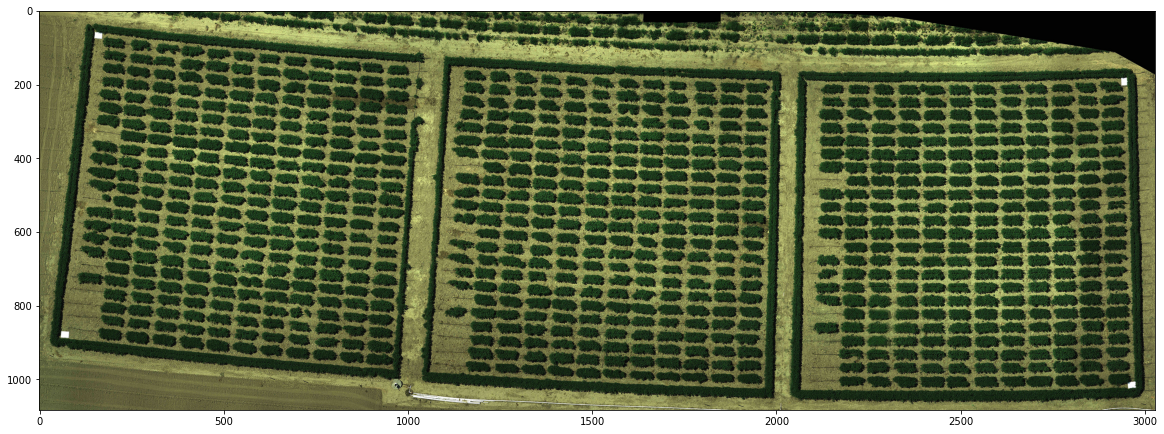

In [66]:
from modules.image_handler import load_img
image = load_img("data/alfalfa.jpg")
plt.figure(figsize=(20, 10))
plt.imshow(image)
print("Dimension: ", image.shape)

#### *Draw an area of interest*
Like what we did earlier, we can define a closed shape using four xy- coordinates.

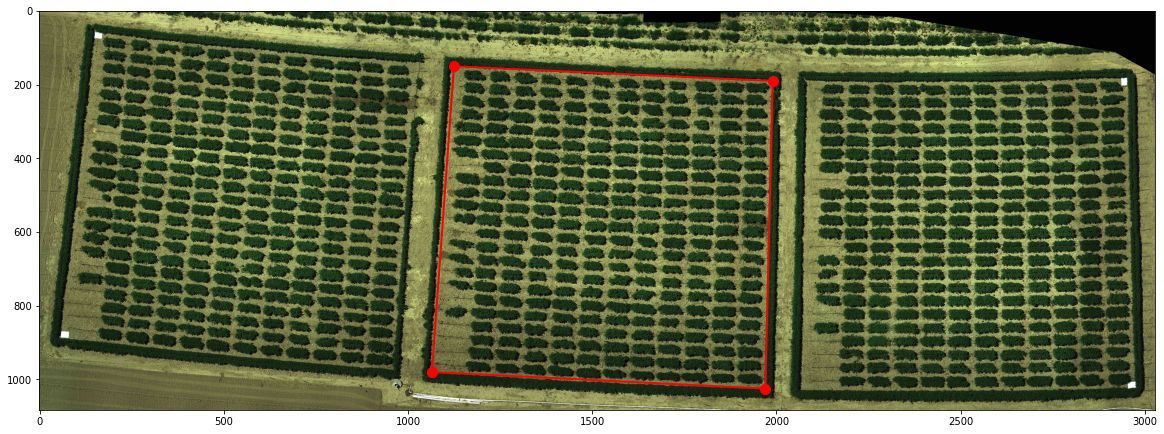

In [73]:
# define an area of interest using four xy- points
x = [1065, 1970, 1990, 1125,1065]
y = [980, 1025, 190, 150,980]

# visualized the area of interest
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.plot(x, y, 'o-', linewidth=2, markersize=10, color='red')

#### *Make $P$ and $\hat{P}$ matrices*

In [69]:
# make P and P hat
P = np.array([x,
              y,
              [1] * 4])

# we assume our the shape of the destination image is (500, 500)
h, w = 500, 500
P_hat = np.array([[0, w, w, 0],
                  [h, h, 0, 0],
                  [1] * 4])

# validate the matrices
print("P \n", P)
print("P_hat \n", P_hat)

P 
 [[1065 1970 1990 1125]
 [ 980 1025  190  150]
 [   1    1    1    1]]
P_hat 
 [[  0 500 500   0]
 [500 500   0   0]
 [  1   1   1   1]]


#### *Apply perspective transformation*

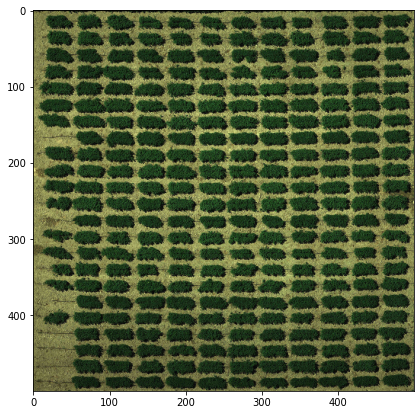

In [70]:
# apply the function we defined earlier
H = find_H(P, P_hat)

# to transform every single pixel from an image efficiently,
# we can borrow the function, warpPerspective() from OpenCV
from cv2 import warpPerspective
image_hat = warpPerspective(image.astype(np.float32), H, (500, 500))
image_hat = image_hat.astype(np.uint8)

# plotting
plt.figure(figsize=(7, 7))
plt.imshow(image_hat)